# ¿Qué es el análisis de componentes principales (PCA)?

- El ACP es un método clásico de reducción de la dimensionalidad no paramétrico y multivariante (aprendizaje automático no supervisado) que se utiliza para interpretar la variación en un conjunto de datos interrelacionados de alta dimensión (conjunto de datos con un gran número de variables)
- El PCA reduce los datos interrelacionados de alta dimensión a baja dimensión transformando linealmente la antigua variable en un nuevo conjunto de variables no correlacionadas llamado componente principal (PC), conservando la mayor variación posible.
- El primer componente tiene la mayor varianza, seguido del segundo componente y así sucesivamente. Los primeros componentes retienen la mayor parte de la variación, lo que facilita la visualización y resume la característica de los conjuntos de datos originales de alta dimensión en un espacio de baja dimensión. El PCA ayuda a evaluar qué muestras originales son similares y diferentes entre sí.
- El PCA preserva la estructura global de los datos mediante la formación de clusters bien separados, pero puede no preservar las similitudes dentro de los clusters.
- El PCA funciona mejor a la hora de revelar patrones lineales en datos de alta dimensión, pero tiene limitaciones con el conjunto de datos no lineales. El t-SNE (**t-distributed stochastic neighbor embedding**) puede utilizarse para reducir la dimensionalidad de los conjuntos de datos no lineales.  
- Por ejemplo, cuando los conjuntos de datos contienen 10 variables (10D), es arduo visualizarlas al mismo tiempo (puede que tenga que hacer 45 comparaciones por pares para interpretar el conjunto de datos de forma eficaz). El PCA las transforma en un nuevo conjunto de variables (PCs) con los PCs superiores que tienen la mayor variación. Los PCs están ordenados, lo que significa que los primeros PCs (generalmente los 3 primeros PCs, pero pueden ser más) contribuyen a la mayor parte de la varianza presente en el conjunto de datos original de alta dimensión. Estos 2 o 3 primeros PCs pueden ser representados fácilmente y resumir las características de las 10 variables originales.
- El PCA es un método útil en el campo de la bioinformática, donde los experimentos de secuenciación de alto rendimiento (por ejemplo, RNA-seq, GWAS) a menudo conducen a la generación de conjuntos de datos de alta dimensión (de unos cientos a miles de muestras). Por ejemplo, en los experimentos de ARN-seq, el PCA ayuda a comprender los patrones de expresión génica y la variación biológica en un conjunto de datos de ARN-seq de alta dimensión.

## Vamos a Identificar un conjunto de datos para entender como funciona PCA en la práctica

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("ionosphere.data",names=range(0,34))

Los datos vienen en pares de columnas por antena (envio y recibido)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [4]:
data=data.drop(columns=[0])

In [5]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,33
1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
1,351.0,0.641342,0.497708,-1.0,0.472135,0.87111,1.000000,1.0
2,351.0,0.044372,0.441435,-1.0,-0.064735,0.01631,0.194185,1.0
3,351.0,0.601068,0.519862,-1.0,0.412660,0.80920,1.000000,1.0
4,351.0,0.115889,0.460810,-1.0,-0.024795,0.02280,0.334655,1.0
5,351.0,0.550095,0.492654,-1.0,0.211310,0.72873,0.969240,1.0
6,351.0,0.119360,0.520750,-1.0,-0.054840,0.01471,0.445675,1.0
7,351.0,0.511848,0.507066,-1.0,0.087110,0.68421,0.953240,1.0
8,351.0,0.181345,0.483851,-1.0,-0.048075,0.01829,0.534195,1.0
9,351.0,0.476183,0.563496,-1.0,0.021120,0.66798,0.957895,1.0
10,351.0,0.155040,0.494817,-1.0,-0.065265,0.02825,0.482375,1.0


In [7]:
data0=data.drop(columns=33)

In [8]:
data0.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


## En este ejemplo de PCA utilizando la biblioteca Sklearn, utilizaremos un conjunto de datos altamente dimensional mostraremos

- Cómo se puede utilizar el PCA para visualizar el conjunto de datos de alta dimensión.
- Cómo PCA puede evitar el sobreajuste en un clasificador debido al conjunto de datos de alta dimensión.
- Cómo el PCA puede mejorar la velocidad del proceso de entrenamiento.

Utilizaremos los paquetes sklearn, seaborn y bioinfokit (v2.0.2 o posterior) para el PCA y la visualización (consulte cómo instalar los paquetes de Python).!

## Así que empecemos.!!!!!!!!

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [10]:
data[33].value_counts()

g    225
b    126
Name: 33, dtype: int64

## Visualización de un conjunto de datos de alta dimensión con PCA usando Sklearn

Como hemos comentado anteriormente, no es posible para los humanos visualizar datos que tengan más de 3 dimensiones. En este conjunto de datos, hay N dimensiones. Reduzcamos la alta dimensionalidad del conjunto de datos utilizando PCA para visualizarlo tanto en 2D como en 3D.

### Normalización del conjunto de datos

Es obligatorio estandarizar el conjunto de datos antes de aplicar PCA, de lo contrario, producirá resultados erróneos. Aquí utilizamos la función `StandardScaler()` del módulo `sklearn.preprocessing` para estandarizar los conjuntos de datos de entrenamiento y de prueba.

In [11]:
# this is an optional step
df_st =  StandardScaler().fit_transform(data0)  
pd.DataFrame(df_st, columns=data0.columns).head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,0.712372,-0.234257,0.484208,-0.201735,0.577059,-0.954679,0.964074,-0.297510,0.668655,-0.673107,...,0.297728,-0.867565,-0.253868,-0.713971,-0.288290,-0.617039,0.122937,-1.055054,-0.312221,-0.999595
1,0.721648,-0.527811,0.634308,-1.037587,-1.339106,-2.029452,0.964074,-0.469482,0.057860,-1.684781,...,-1.037790,-0.383054,-1.447849,-0.208419,-0.989185,-0.173530,-0.909063,-0.115213,-0.932605,-0.083286
2,0.721648,-0.176998,0.768477,-0.241309,0.914531,-0.461494,0.746139,-0.350536,0.452533,-0.205582,...,0.310141,-0.651896,0.093506,-0.276586,0.091389,-0.287320,0.441318,-0.464092,0.404443,-0.848591
3,0.721648,-1.125172,0.768477,1.921340,0.329433,-2.152585,-1.010873,-0.375331,-0.846256,-0.313776,...,1.045426,1.926340,-0.049490,1.947300,1.080843,-0.341218,-0.167687,1.957315,-1.289826,2.107299
4,0.721648,-0.155129,0.655594,-0.109918,0.754068,-0.676741,0.512838,-0.714742,0.092053,-0.724108,...,-0.628910,-1.143025,-0.792950,-0.842112,-0.615818,-1.171144,-0.717726,-1.154227,-0.757673,-1.435736


## Estandarización

- El conjunto de datos de estandarización con escala (media=0, varianza=1) es necesario ya que elimina los sesgos de las variables originales. Por ejemplo, cuando los datos de cada variable se recogen en unidades diferentes.
- Las variables estandarizadas no tendrán unidades y tendrán una varianza similar.
- La estandarización es un método aconsejable para la transformación de datos cuando las variables del conjunto de datos original se han medido en una escala significativamente diferente.
- En algunos casos, no es necesario estandarizar el conjunto de datos, ya que la variación original del conjunto de datos es importante (Gewers et al., 2018)

## Perform PCA using scikit-learn!

In [16]:
pca_out = PCA(n_components=3).fit(df_st)

print(f"# de componentes = {len(pca_out.explained_variance_ratio_)}, explica el = {round(sum(pca_out.explained_variance_ratio_)*100,2)}%")
pca_out.explained_variance_ratio_

# de componentes = 3, explica el = 48.87%


array([0.27488802, 0.13236101, 0.08141853])

In [17]:
pca_out = PCA(n_components=10).fit(df_st)

# get the component variance
# Proportion of Variance (from PC1 to PC6)

print(f"# de componentes = {len(pca_out.explained_variance_ratio_)}, explica el = {round(sum(pca_out.explained_variance_ratio_)*100,2)}%")
pca_out.explained_variance_ratio_

# de componentes = 10, explica el = 77.18%


array([0.27488802, 0.13236101, 0.08141853, 0.07398065, 0.05902226,
       0.03581799, 0.03191289, 0.02915077, 0.02766634, 0.02553971])

In [13]:
# Cumulative proportion of variance (from PC1 to PC6)   
np.cumsum(pca_out.explained_variance_ratio_)

array([0.27488802, 0.40724903, 0.48866756, 0.56264821, 0.62167046,
       0.65748845, 0.68940134, 0.71855211, 0.74621846, 0.77175816])

Comparando la importancia de las variables sobre por `PrincpalComponents`

In [19]:
# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = data0.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
variable,,,,,,,,,,
1,-0.118634,0.112693,0.350508,-0.097076,0.004030,-0.350689,0.320807,-0.002532,-0.060892,-0.210735
2,0.097935,0.065529,0.192310,-0.025020,0.510844,0.037880,0.230243,-0.056620,-0.069596,0.083910
3,-0.168015,0.104252,0.316853,-0.122456,-0.006829,0.034847,-0.179752,-0.084754,-0.485303,-0.156811
4,0.094845,0.000309,0.202739,0.171724,-0.473830,0.096418,0.107607,-0.083331,-0.163632,-0.190982
5,-0.204876,0.107764,0.247538,-0.175049,-0.089821,0.296632,-0.063314,-0.034128,-0.031841,-0.079966
6,0.164106,0.084527,0.296504,0.176433,0.019645,0.037712,-0.149623,-0.326272,0.192105,0.075573
7,-0.235662,0.097476,0.037790,-0.184823,-0.143048,-0.325875,-0.012834,-0.095446,0.150681,-0.184064
8,0.160765,0.086681,0.270705,0.005021,0.003769,-0.130227,-0.287262,0.349264,0.072320,0.162841
9,-0.254985,0.103055,-0.042622,-0.128531,0.017703,-0.269957,-0.046126,-0.163198,-0.100087,0.085658


- **Positive and negative values in component loadings reflects the positive and negative correlation of the variables with the PCs. Algunas variables correlacionan bien con algunas componentes (positivamente) mientras que otras correlacional negativamente, algunas ni siguiera correlacionan**... ¡Puedes decir cuáles en este caso?

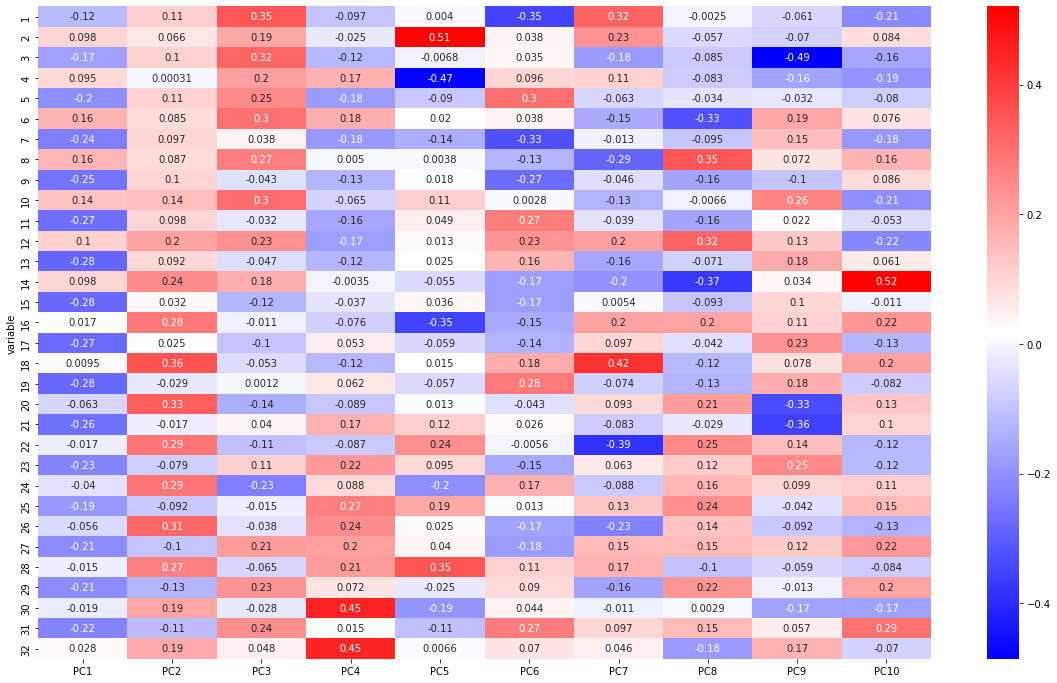

In [24]:
# get correlation matrix plot for loadings
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
ax = sns.heatmap(loadings_df, annot=True, cmap='bwr')
plt.show()

Importancia de variables por componentes

In [31]:
ui = 0.25       # umbral de importancia
for x in loadings_df:
    va = list(loadings_df[abs(loadings_df[x])>=ui][x].index)
    va = [str(v) for v in sorted(va)]
    print(f"{x}:\tnumber of vars={len(va)}, vars={','.join(va)}")

PC1:	number of vars=7, vars=9,11,13,15,17,19,21
PC2:	number of vars=7, vars=16,18,20,22,24,26,28
PC3:	number of vars=5, vars=1,3,6,8,10
PC4:	number of vars=3, vars=25,30,32
PC5:	number of vars=4, vars=2,4,16,28
PC6:	number of vars=7, vars=1,5,7,9,11,19,31
PC7:	number of vars=4, vars=1,8,18,22
PC8:	number of vars=4, vars=6,8,12,14
PC9:	number of vars=4, vars=3,10,20,21
PC10:	number of vars=2, vars=14,31


In [16]:
loadings_df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], dtype='object')

In [17]:
abs(loadings_df["PC1"]).mean()

0.15002015145732758

In [18]:
pca_out.explained_variance_ratio_, pca_out.explained_variance_ratio_[:4].sum()

(array([0.27488802, 0.13236101, 0.08141853, 0.07398065, 0.05902226,
        0.03581799, 0.03191289, 0.02915077, 0.02766634, 0.02553971]),
 0.5626482055669169)

## Retención de los componentes principales (PC)

- Cuando el número de PCs es igual al número de variables originales, deberíamos mantener sólo los PCs que explican la mayor parte de la varianza (70-95%) para facilitar la interpretación. Cuantas más PCs se incluyan que expliquen la mayor parte de la variación en los datos originales, mejor será el modelo PCA. Esto es muy subjetivo y se basa en la interpretación del usuario (Cangelosi et al., 2007).

- Los valores propios (varianza explicada por cada PC) de las PC pueden ayudar a retener el número de PC. Generalmente, los PC con valores propios > 1 contribuyen a una mayor varianza y deberían retenerse para el análisis posterior.
    
- El gráfico Scree (para la prueba del codo) es otra técnica gráfica útil para retener las PC. Deberíamos mantener los PCs en los que hay un cambio brusco en la pendiente de la línea que conecta los PCs adyacentes.

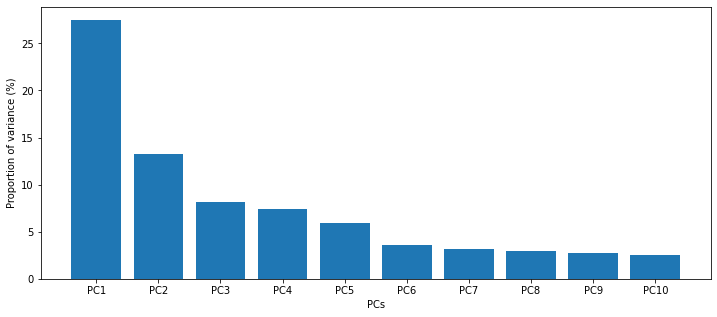

In [19]:
plt.figure(figsize=(12,5))
plt.bar(loadings_df.columns,pca_out.explained_variance_ratio_*100)
plt.ylabel("Proportion of variance (%)")
plt.xlabel("PCs")
plt.show()

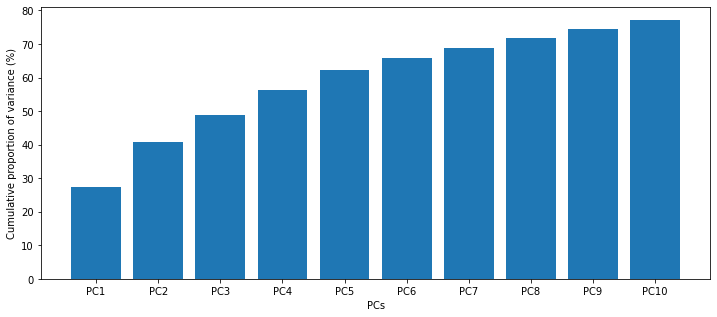

In [20]:
plt.figure(figsize=(12,5))
plt.bar(loadings_df.columns,np.cumsum(pca_out.explained_variance_ratio_*100))
plt.ylabel("Cumulative proportion of variance (%)")
plt.xlabel("PCs")
plt.show()

In [35]:
!"C:\Python\py39\Scripts\pip.exe" install bioinfokit

     ---------------------------------------- 84.6/84.6 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



     ---------------------------------------- 9.1/9.1 MB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 233.7/233.7 kB 4.8 MB/s eta 0:00:00
  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-py3-none-any.whl size=56770 sha256=5ddce14f4733226c1721a16940c337fcc51aefaee6e4b6d232cb62060ac8ec0e
  Stored in directory: c:\users\dherrera\appdata\local\pip\cache\wheels\fa\50\db\bf79767c7cbac03b20b9444bcce9bc3c1507c6d143cad39656
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=8b94a159a90875cbe1b02f3059dd7564a21e9ded1cc109c9c42faceb621abf6c
  Stored in directory: c:\users\dherrera\appdata\local\pip\cache\wheels\6b\1d\79\4326d5f3a7d86fb9900e5564e7a0f98b552da5103ca762f24f
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.7-py3-none-any.whl size=32155 sha256=c467ce8a209f099fb52a98e8aa7ffbb2af1dda908a3445e4302f3477

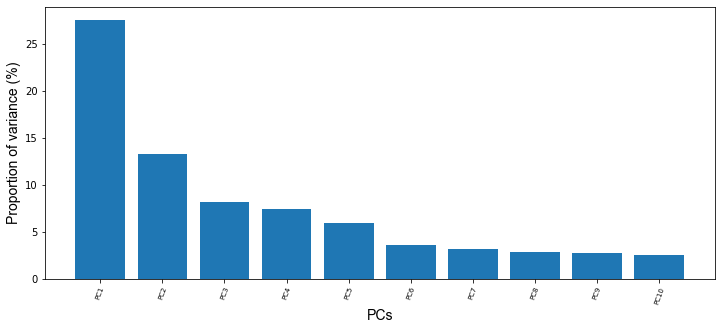

In [36]:
# get eigenvalues (variance explained by each PC)  
pca_out.explained_variance_

# get scree plot (for scree or elbow test)
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[loadings_df.columns,pca_out.explained_variance_ratio_],show=True,dim=(12,5),axlabelfontsize=14,)
plt.show()
# Scree plot will be saved in the same directory with name screeplot.png

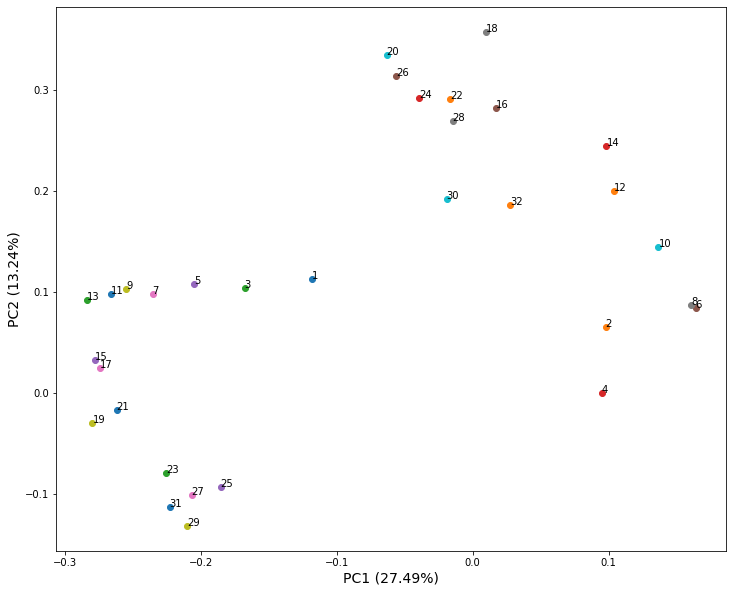

In [22]:
# get PCA loadings plots (2D and 3D)
# 2D
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=data0.columns.values,
                show=True,dim=(12,10),axlabelfontsize=14,
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

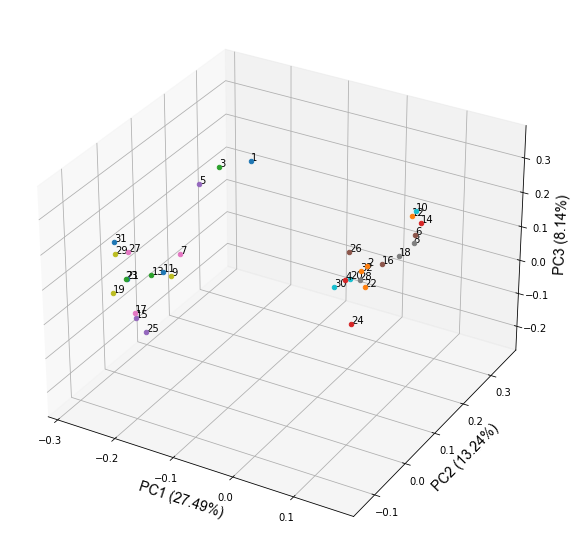

In [37]:
# 3D
cluster.pcaplot(x=loadings[0], y=loadings[1], z=loadings[2],  labels=data0.columns.values, 
                show=True,dim=(12,10),axlabelfontsize=14,
                var1=round(pca_out.explained_variance_ratio_[0]*100, 2), 
                var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
                var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

## Biplot del PCA

- En biplot, las cargas y las puntuaciones de las PC se representan en una sola figura los biplots son útiles para visualizar las relaciones entre las variables y las observaciones.

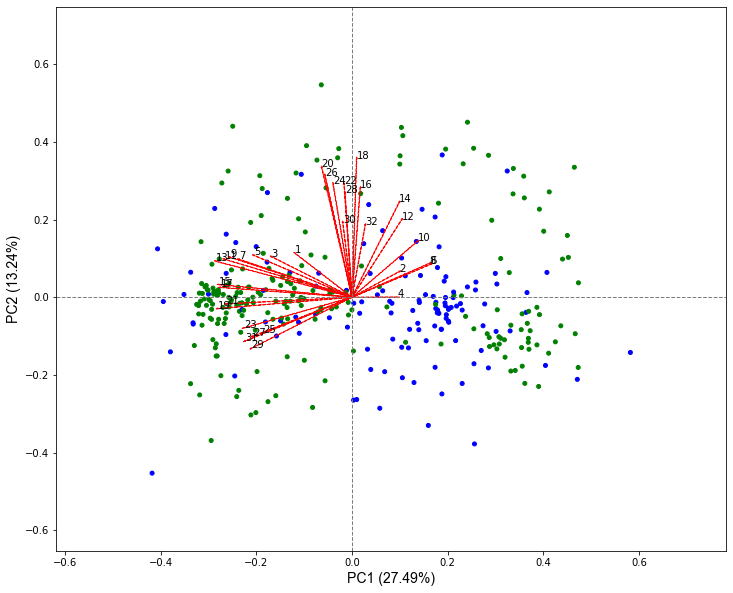

In [38]:
# get PC scores
pca_scores = PCA().fit_transform(df_st)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data0.columns.values,dotsize=16,
               colordot=data[33],arrowcolor='r',arrowlinewidth=0.9,arrowlinestyle='--',show=True,dim=(12,10),axlabelfontsize=14,
               var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
               var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

En terminos generales las antenas 14,12,10,8,2,4 miden mal los datos.

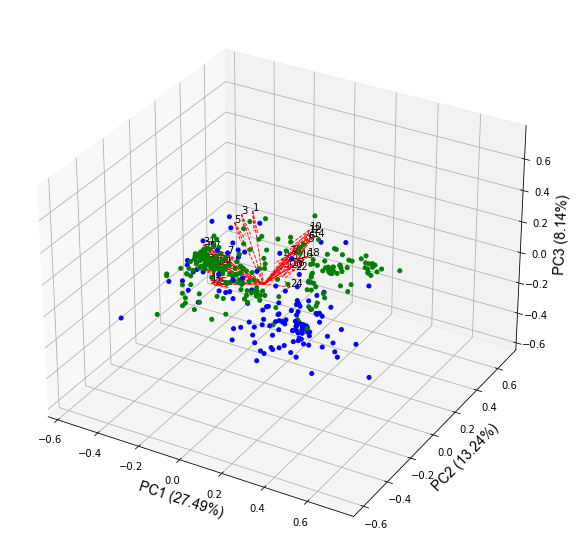

In [39]:
# get 3D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data0.columns.values,
               dotsize=16,colordot=data[33],arrowcolor='r',arrowlinewidth=0.9,arrowlinestyle='--',show=True,dim=(12,10),axlabelfontsize=14,
               var1=round(pca_out.explained_variance_ratio_[0]*100, 2), 
               var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
               var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

## Interpretación del ACP

Las tres primeras PC (3D) contribuyen al ~50% de la variación total del conjunto de datos y tienen valores propios > 1, por lo que proporcionan una buena aproximación a la variación presente en el conjunto de datos original (véase la proporción acumulada de la varianza y el diagrama de dispersión). El corte del 70% de variación acumulada es común para retener los PC para el análisis (Jolliffe et al., 2016). 

Aunque los primeros cuatro PCs contribuyen en un ~56% y tienen valores propios > 1, será difícil visualizarlos a la vez y es necesario realizar una visualización por pares.
   
A partir del biplot y del gráfico de cargas, podemos ver que las variables 8 y 10 están altamente asociadas y forman un clúster (la respuesta de la expresión en las condiciones 8 y 10 son altamente similares). De forma similar, 20, 26, 22, 24 y 28 (por ejemplo) están altamente asociadas y forman otro cluster (la respuesta de la expresión en las condiciones estas son altamente similares pero diferentes de otros clusters). Si las variables están altamente asociadas, el ángulo entre los vectores de las variables debe ser lo más pequeño posible en el biplot.

La longitud de las PC en el biplot se refiere a la cantidad de varianza contribuida por las PC. Cuanto más larga sea la longitud de las PC, mayor será la varianza aportada y estará bien representada en el espacio.

## Referencias

1. Pedregosa F, Varoquaux G, Gramfort A, Michel V, Thirion B, Grisel O, Blondel M, Prettenhofer P, Weiss R, Dubourg V, Vanderplas J. Scikit-learn: Machine learning in Python. the Journal of machine Learning research. 2011 Nov 1;12:2825-30.
2. Abdi H, Williams LJ. Principal component analysis. Wiley interdisciplinary reviews: computational statistics. 2010 Jul;2(4):433-59.
3. Jolliffe IT, Cadima J. Principal component analysis: a review and recent developments. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences. 2016 Apr 13;374(2065):20150202.
4. Gewers FL, Ferreira GR, de Arruda HF, Silva FN, Comin CH, Amancio DR, Costa LD. Principal component analysis: A natural approach to data exploration. arXiv preprint arXiv:1804.02502. 2018 Apr 7.
5. Bedre R, Rajasekaran K, Mangu VR, Timm LE, Bhatnagar D, Baisakh N. Genome-wide transcriptome analysis of cotton (Gossypium hirsutum L.) identifies candidate gene signatures in response to aflatoxin producing fungus Aspergillus flavus. PLoS One. 2015;10(9).
6. Kirkwood RN, Brandon SC, de Souza Moreira B, Deluzio KJ. Searching for stability as we age: the PCA-Biplot approach. International Journal of Statistics in Medical Research. 2013 Oct 1;2(4):255.
7. Cangelosi R, Goriely A. Component retention in principal component analysis with application to cDNA microarray data. Biology direct. 2007 Dec 1;2(1):2.
8. Vallejos CA. Exploring a world of a thousand dimensions. Nature Biotechnology. 2019 Dec;37(12):1423-4.
9. Budaev SV. Using principal components and factor analysis in animal behaviour research: caveats and guidelines. Ethology. 2010 May;116(5):472-80.
10. Fisher RA. The use of multiple measurements in taxonomic problems. Annals of eugenics. 1936 Sep;7(2):179-88.

# Análisis de componentes principales (PCA) con una variable objetivo (Otro ejemplo!)

Hemos cubierto el PCA con un conjunto de datos que no tiene una variable objetivo. Ahora, realizaremos el PCA en el conjunto de datos de la planta del iris, que tiene una variable objetivo.

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from bioinfokit.analys import get_data
from bioinfokit.visuz import cluster

# load iris dataset
df = get_data('iris').data
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [27]:
X = df.iloc[:,0:4]
target = df['class'].to_numpy()
X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [28]:
X_st =  StandardScaler().fit_transform(X)
pca_out = PCA(n_components=3).fit(X_st)

# component loadings
loadings = pca_out.components_
loadings

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ]])

In [29]:
# get eigenvalues (variance explained by each PC)  
pca_out.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832])

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


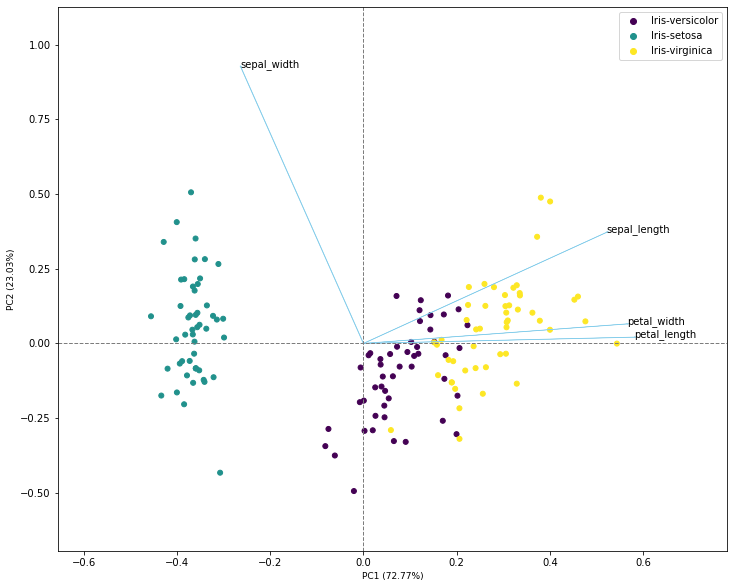

In [30]:
# get biplot
pca_scores = PCA().fit_transform(X_st)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=X.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2), colorlist=target, show=True,dim=(12,10), dotsize=25)


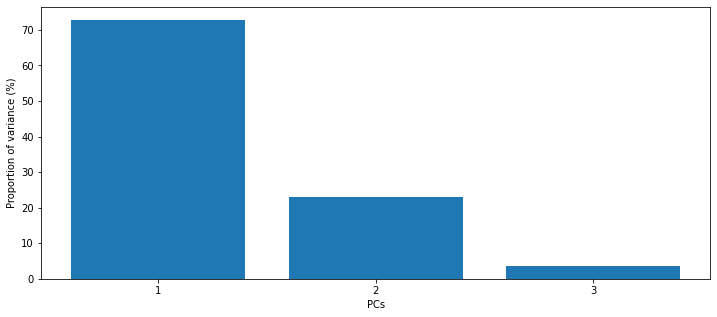

In [31]:
plt.figure(figsize=(12,5))
plt.bar(np.arange(1,4,1),pca_out.explained_variance_ratio_*100)
plt.ylabel("Proportion of variance (%)")
plt.xlabel("PCs")
plt.xticks(np.arange(1,4,1))
plt.show()